# 
<h1 style="text-align: center;">ELE489 FUNDAMENTALS OF MACHINE LEARNING</h1>
<h2 style="text-align: center;">HW1</h2>
<h3 style="text-align: center;">ALI OZYUKSEL</h3>
<h3 style="text-align: center;">2220357137</h3>
<h3 style="text-align: center;"> </h3>
<h3 style="text-align: center;">01.04.2025</h3>

## Question 1 

### Reading the Data

In [1]:
import pandas as pd

# Let us read the data and give the corresponding column names.

data_file = "wine.data"
column_names = ["Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", 
                "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
                "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

df = pd.read_csv(data_file, names=column_names)
print(df.head(n=5)) 

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

### First look to the data
- We will look at the data to understand what we are dealing with.

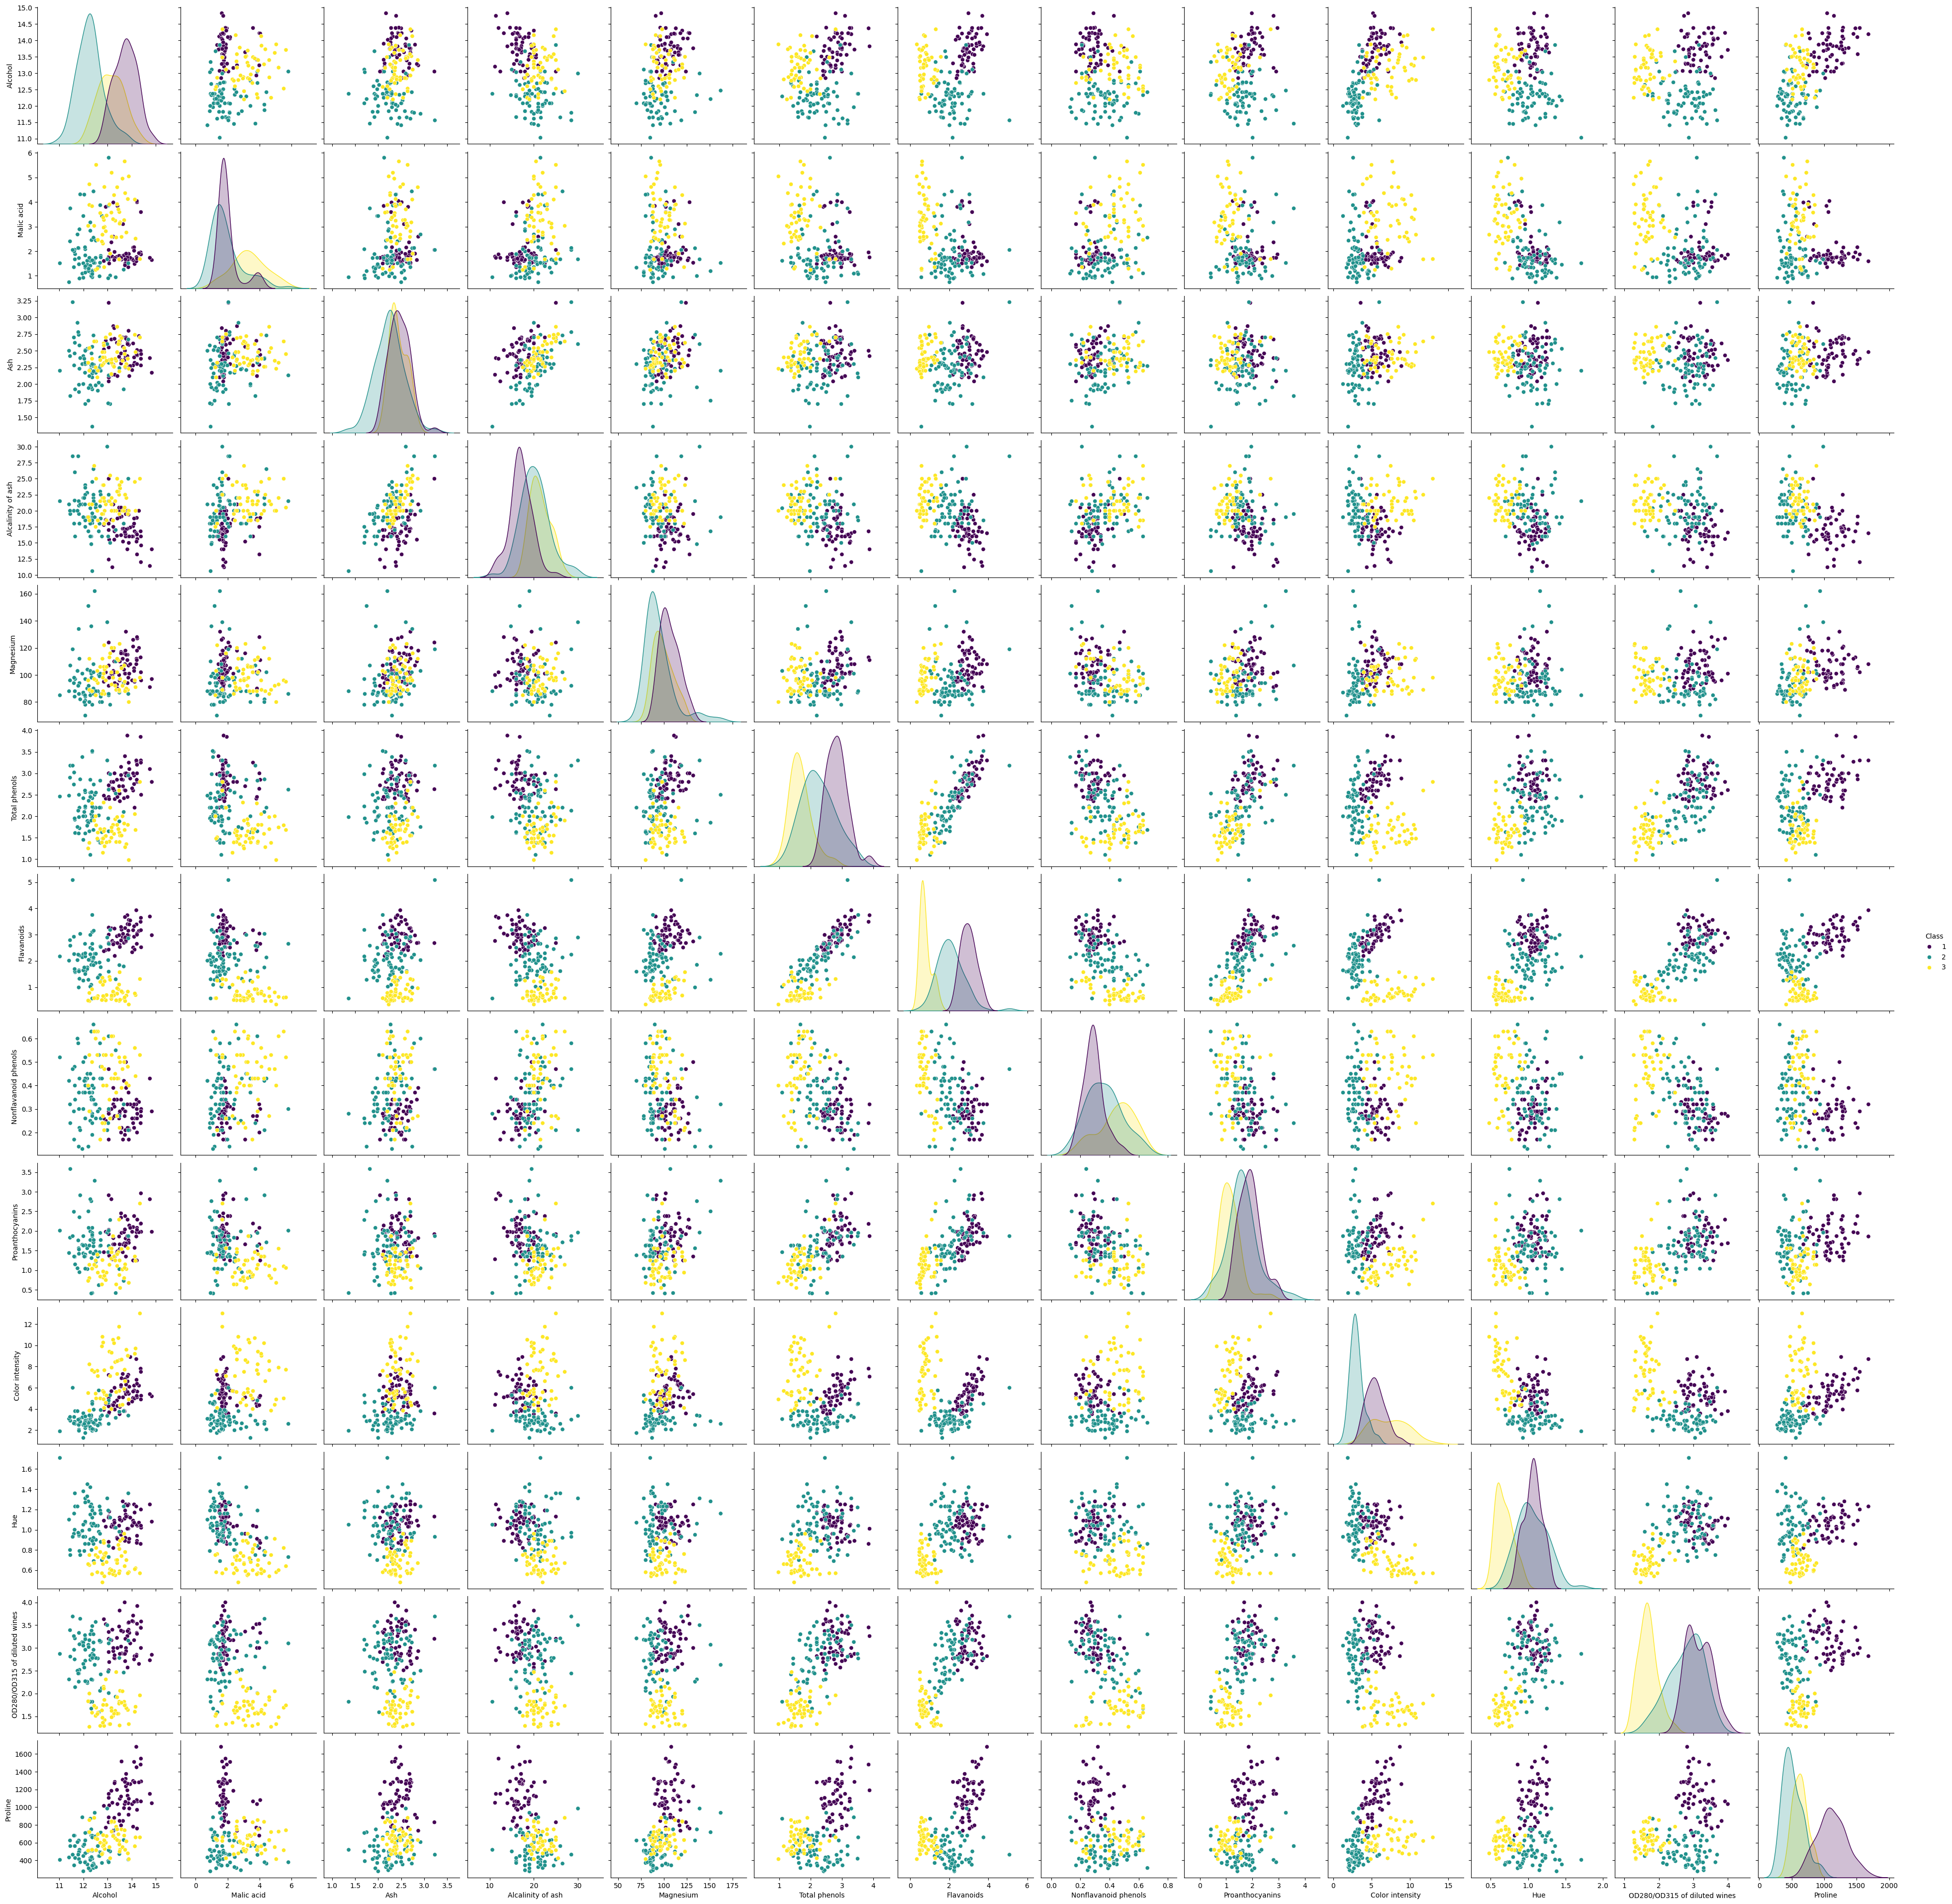

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# At first, we can take a look at the big picture. 
# By means of the pairplot function, we can see the each relationship between each pair of features.
# It takes time to run it but it is showing us what we are dealing with.

sns.pairplot(df, hue="Class", height=3,palette='viridis', diag_kind='kde')
plt.show()

### What is overlapping?
- Now delve into some graphs to see what is overlapping by checking the probability densities of the features


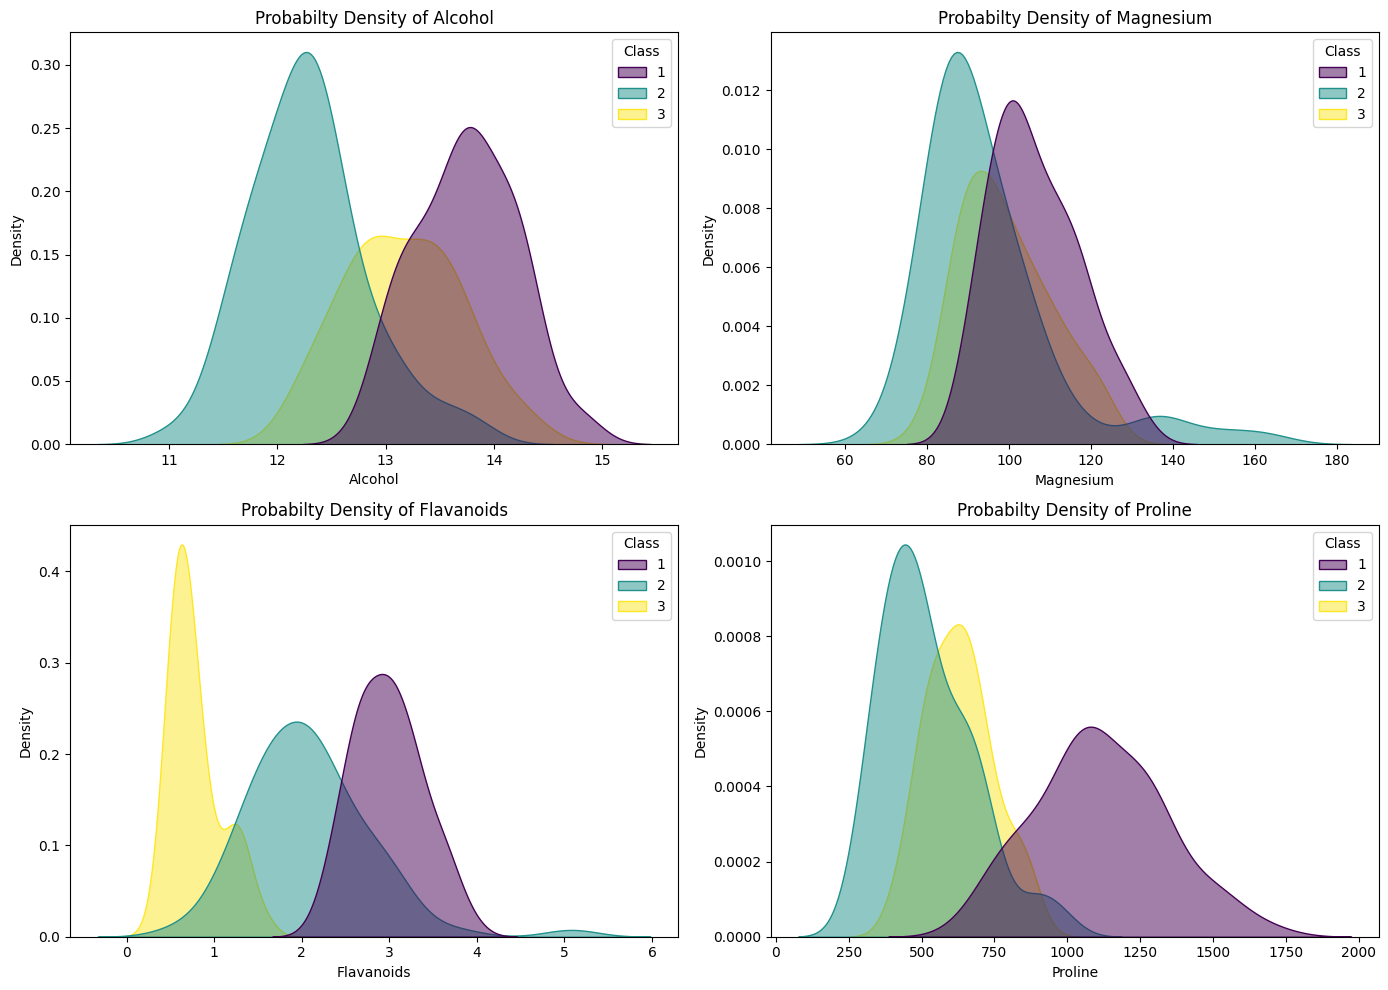

In [3]:
# example plots of the distribution of some features to see what is overlapping. detailed information is in the report.
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  
sns.kdeplot(data=df, x="Alcohol", hue="Class", fill=True, alpha=0.5,palette='viridis',ax=axes[0, 0])
axes[0, 0].set_title('Probabilty Density of Alcohol')

sns.kdeplot(data=df, x="Magnesium", hue="Class", fill=True, alpha=0.5,palette='viridis',ax=axes[0,1])
axes[0,1].set_title('Probabilty Density of Magnesium')

sns.kdeplot(data=df, x="Flavanoids", hue="Class", fill=True, alpha=0.5,palette='viridis',ax=axes[1,0])
axes[1,0].set_title('Probabilty Density of Flavanoids')

sns.kdeplot(data=df, x="Proline", hue="Class", fill=True, alpha=0.5,palette='viridis',ax=axes[1,1])
axes[1,1].set_title('Probabilty Density of Proline')

plt.tight_layout() 
plt.show()


### Feature-Feature plot
- Now we can check overlapping, correlation and outliers by scatterploting two of the features.

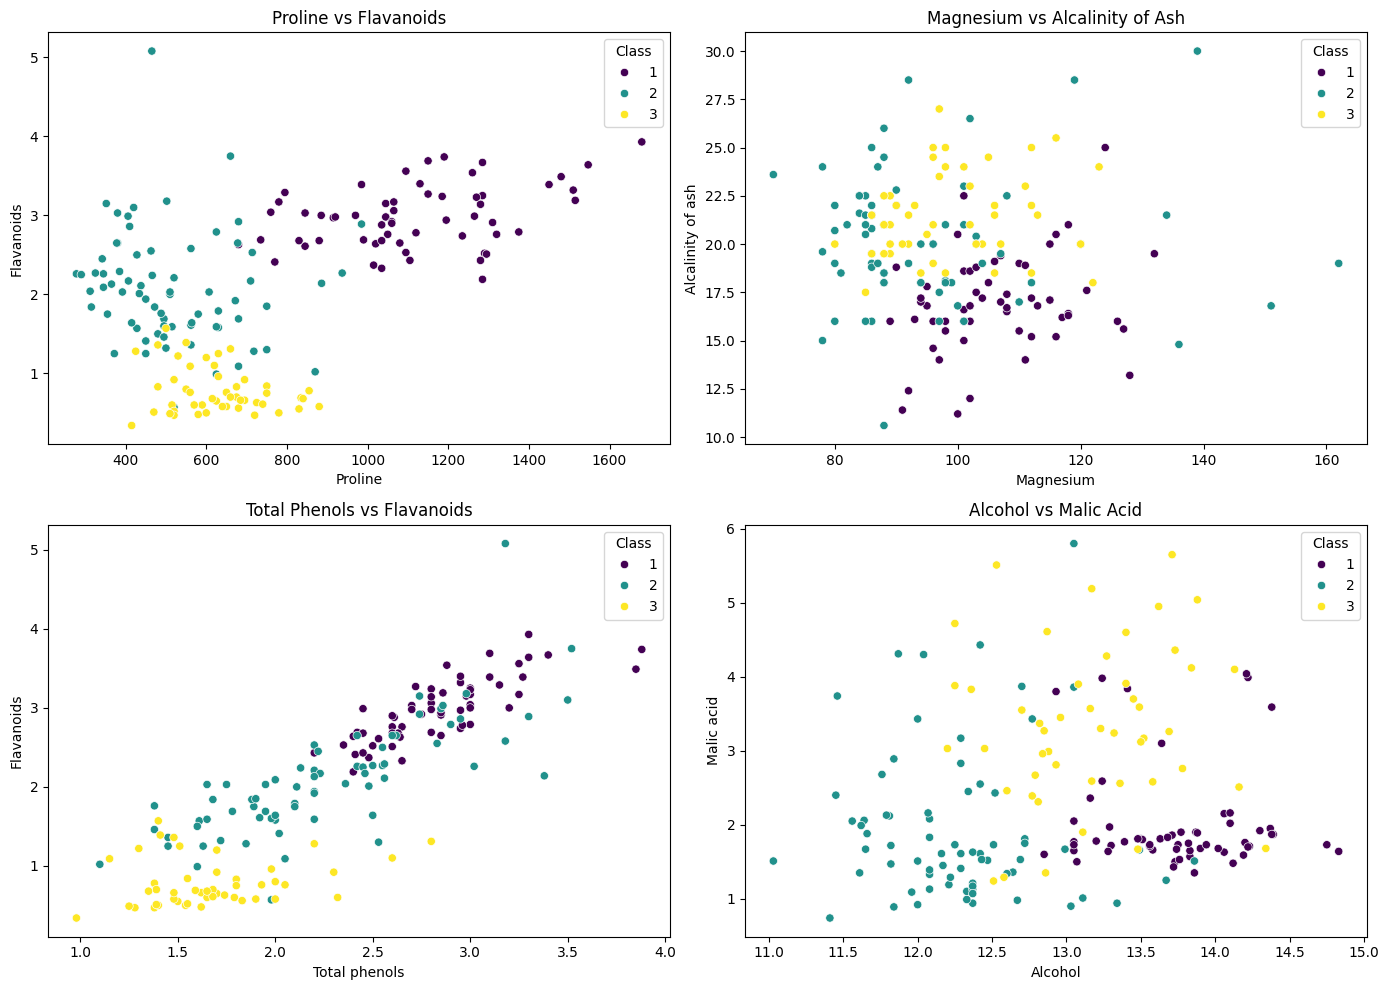

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))  

sns.scatterplot(data=df, x="Proline", y="Flavanoids", hue="Class", palette="viridis", ax=axes[0, 0])
axes[0, 0].set_title("Proline vs Flavanoids")

sns.scatterplot(data=df, x="Magnesium", y="Alcalinity of ash", hue="Class", palette="viridis", ax=axes[0, 1])
axes[0, 1].set_title("Magnesium vs Alcalinity of Ash")

sns.scatterplot(data=df, x="Total phenols", y="Flavanoids", hue="Class", palette="viridis", ax=axes[1, 0])
axes[1, 0].set_title("Total Phenols vs Flavanoids")

sns.scatterplot(data=df, x="Alcohol", y="Malic acid", hue="Class", palette="viridis", ax=axes[1, 1])
axes[1, 1].set_title("Alcohol vs Malic Acid")

plt.tight_layout()  
plt.show()

## Question 2 

### Handling missing values
- If exist a null value, it will be dropping them.

In [5]:
print(df.isnull().sum(),"\n")
print(df.isna().sum())

#if there is any null or na values, we can drop them. but it is not necessary in this case. so that line is commented out.

#df.dropna(inplace=True)

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64 

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


### Normalizing the Data
- When using kNN, we will need to check the distance between instances.
- If we leave the data as it is, some features can mislead the classification.
- To normalize the data, we can use the following formula: 
$$ X_{\text{normalized}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}} $$

In [11]:
#we are normalizing the data to make sure that all features are on the same scale.
#and using min-max normalization to scale the data between 0 and 1.
df_first_column = df.iloc[:, 0]
df_normalized = (df - df.min()) / (df.max() - df.min())

#we are keeping the first column as it is because they are just labels. we dont need to normalize them.
df_normalized.iloc[:, 0] = df_first_column
print(df_normalized.head()) 
print(df_normalized.min())
print(df_normalized.max())

   Class   Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0    1.0  0.842105    0.191700  0.572193           0.257732   0.619565   
1    1.0  0.571053    0.205534  0.417112           0.030928   0.326087   
2    1.0  0.560526    0.320158  0.700535           0.412371   0.336957   
3    1.0  0.878947    0.239130  0.609626           0.319588   0.467391   
4    1.0  0.581579    0.365613  0.807487           0.536082   0.521739   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0       0.627586    0.573840              0.283019         0.593060   
1       0.575862    0.510549              0.245283         0.274448   
2       0.627586    0.611814              0.320755         0.757098   
3       0.989655    0.664557              0.207547         0.558360   
4       0.627586    0.495781              0.490566         0.444795   

   Color intensity       Hue  OD280/OD315 of diluted wines   Proline  
0         0.372014  0.455285                      0.97069

### Splitting the Data
- We will be spliting training and testing data 80% and 20%, respectively.

In [15]:
from sklearn.model_selection import train_test_split

#we are splitting the data into training and testing sets.
#X is the features and Y is the target variable.
X = df.drop('Class', axis=1) 
y = df['Class']  
#we are using 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((178, 14), (142, 13), (36, 13), (142,), (36,))

## Question 3

### KNN 
- We can use kNN algorithm that we wrote in this way:

[3 1 3 1 2 1 2 3 1 1 3 3 1 2 1 2 2 2 1 2 1 2 3 3 2 3 2 3 2 1 1 2 3 1 1 1]
0.8055555555555556


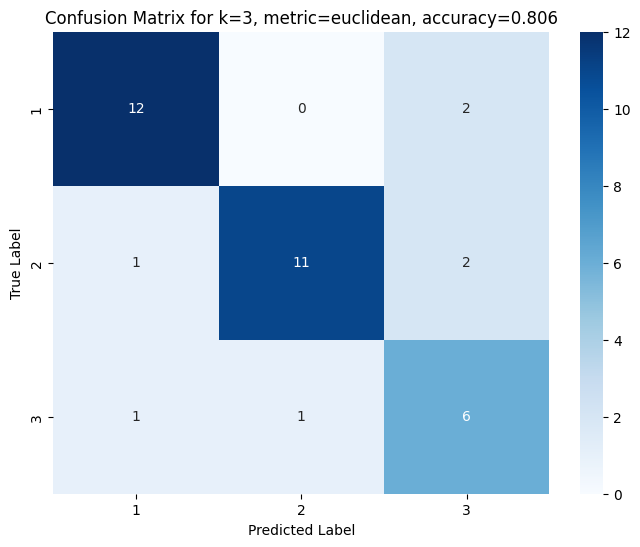

[[12  0  2]
 [ 1 11  2]
 [ 1  1  6]]


<Axes: >

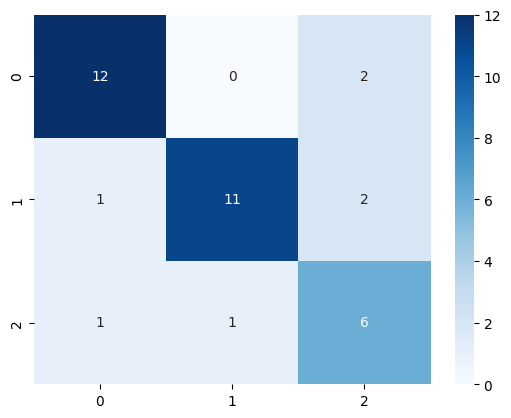

In [ ]:
import knn
# we can create a KNN object and fit it to the training data with given k value and distance metric.
k1 = knn.KNN(3, "euclidean")
k1.fit(X_train, y_train)
y_pred=k1.predict(X_test)
print(y_pred)
# we can check the accuracy of the model.
acc = k1.evaluate(X_test, y_test)
print(acc)
# we can see the confusion matrix of the model by looking it as heatmap.
k1.plotting(X_test, y_test)
# also we can see the confusion matrix in a tabular form.
conf_matrix = k1.confusion_matrix(X_test, y_test)
print(conf_matrix)

### Compare the effect of k values and distance metric
- We can create as many object we want and create a table out of their results.
- To observe the performance, we will be using more scientific way.
  - We will be keep the metric and change the k.
  - Then plot the accuracy for changing k
- After doing some research, realized that mahalanobis distance is giving better results in classification problems.
- So it is added as an auxilary distance metric to test this fact. It's formula is (Where S is covariance matrix):
$$ d(x, y) = \sqrt{(x - y)^T S^{-1} (x - y)} $$

Accuracy for k=1 and metric is euclidean: 0.778
Accuracy for k=1 and metric is manhattan: 0.833
Accuracy for k=1 and metric is mahalanobis: 0.944
Accuracy for k=3 and metric is euclidean: 0.806
Accuracy for k=3 and metric is manhattan: 0.833
Accuracy for k=3 and metric is mahalanobis: 0.889
Accuracy for k=5 and metric is euclidean: 0.722
Accuracy for k=5 and metric is manhattan: 0.806
Accuracy for k=5 and metric is mahalanobis: 0.917
Accuracy for k=7 and metric is euclidean: 0.694
Accuracy for k=7 and metric is manhattan: 0.806
Accuracy for k=7 and metric is mahalanobis: 0.917
Accuracy for k=9 and metric is euclidean: 0.722
Accuracy for k=9 and metric is manhattan: 0.778
Accuracy for k=9 and metric is mahalanobis: 0.917
Accuracy for k=11 and metric is euclidean: 0.750
Accuracy for k=11 and metric is manhattan: 0.722
Accuracy for k=11 and metric is mahalanobis: 0.889


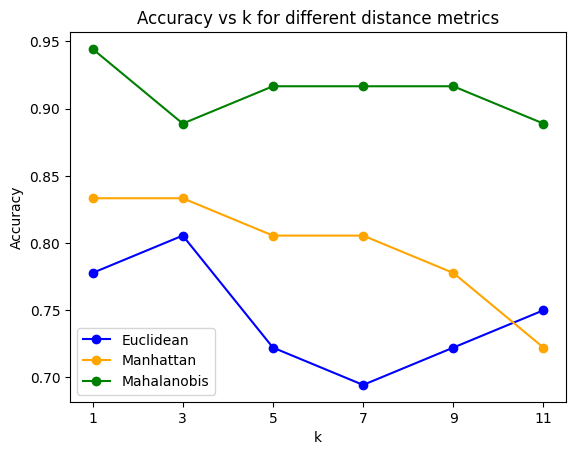

In [25]:
ks = [1, 3, 5, 7, 9, 11]
acc_euclidean = []
acc_manhattan = []
acc_mahalanobis = []
global cm
cm=[]
for k in ks:
    knn_model = knn.KNN(k, "euclidean")
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.evaluate(X_test, y_test)
    cm.append(knn_model.confusion_matrix(X_test, y_test))
    print(f"Accuracy for k={k} and metric is euclidean: {accuracy:.3f}")
    acc_euclidean.append(accuracy)
    knn_model = knn.KNN(k, "manhattan")
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.evaluate(X_test, y_test)
    cm.append(knn_model.confusion_matrix(X_test, y_test))
    print(f"Accuracy for k={k} and metric is manhattan: {accuracy:.3f}")
    acc_manhattan.append(accuracy)
    knn_model = knn.KNN(k, "mahalanobis")
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.evaluate(X_test, y_test)
    print(f"Accuracy for k={k} and metric is mahalanobis: {accuracy:.3f}")
    acc_mahalanobis.append(accuracy)
    cm.append(knn_model.confusion_matrix(X_test, y_test))

plt.plot(ks, acc_euclidean, marker='o', color="blue", label="Euclidean")
plt.plot(ks, acc_manhattan, marker='o', color="orange", label="Manhattan")
plt.plot(ks, acc_mahalanobis, marker='o', color="green", label="Mahalanobis")
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k for different distance metrics")
plt.legend()


### Classification Report
- Lastly, we can look up classification report.
- It consists of the following metrics:
  - Precision: Measures how many of the predicted positive instances are actually correct.
$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}} $

  - Recall (Sensitivity, True Positive Rate): Measures how many actual positive instances were correctly predicted.
$ \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}} $

  - F1-Score: The harmonic mean of precision and recall, providing a balanced measure.
$ F_1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $

  - And lastly, support: The number of true instances for each class in the dataset.

Class  precision    recall  f1-score    support   k       Metric
0               1   0.750000  0.857143  0.800000  14.000000   1    euclidean
1               2   0.846154  0.785714  0.814815  14.000000   1    euclidean
2               3   0.714286  0.625000  0.666667   8.000000   1    euclidean
3        accuracy   0.777778  0.777778  0.777778   0.777778   1    euclidean
4       macro avg   0.770147  0.755952  0.760494  36.000000   1    euclidean
..            ...        ...       ...       ...        ...  ..          ...
103             2   1.000000  0.785714  0.880000  14.000000  11  mahalanobis
104             3   0.875000  0.875000  0.875000   8.000000  11  mahalanobis
105      accuracy   0.888889  0.888889  0.888889   0.888889  11  mahalanobis
106     macro avg   0.899510  0.886905  0.886075  36.000000  11  mahalanobis
107  weighted avg   0.903595  0.888889  0.887921  36.000000  11  mahalanobis

[108 rows x 7 columns]

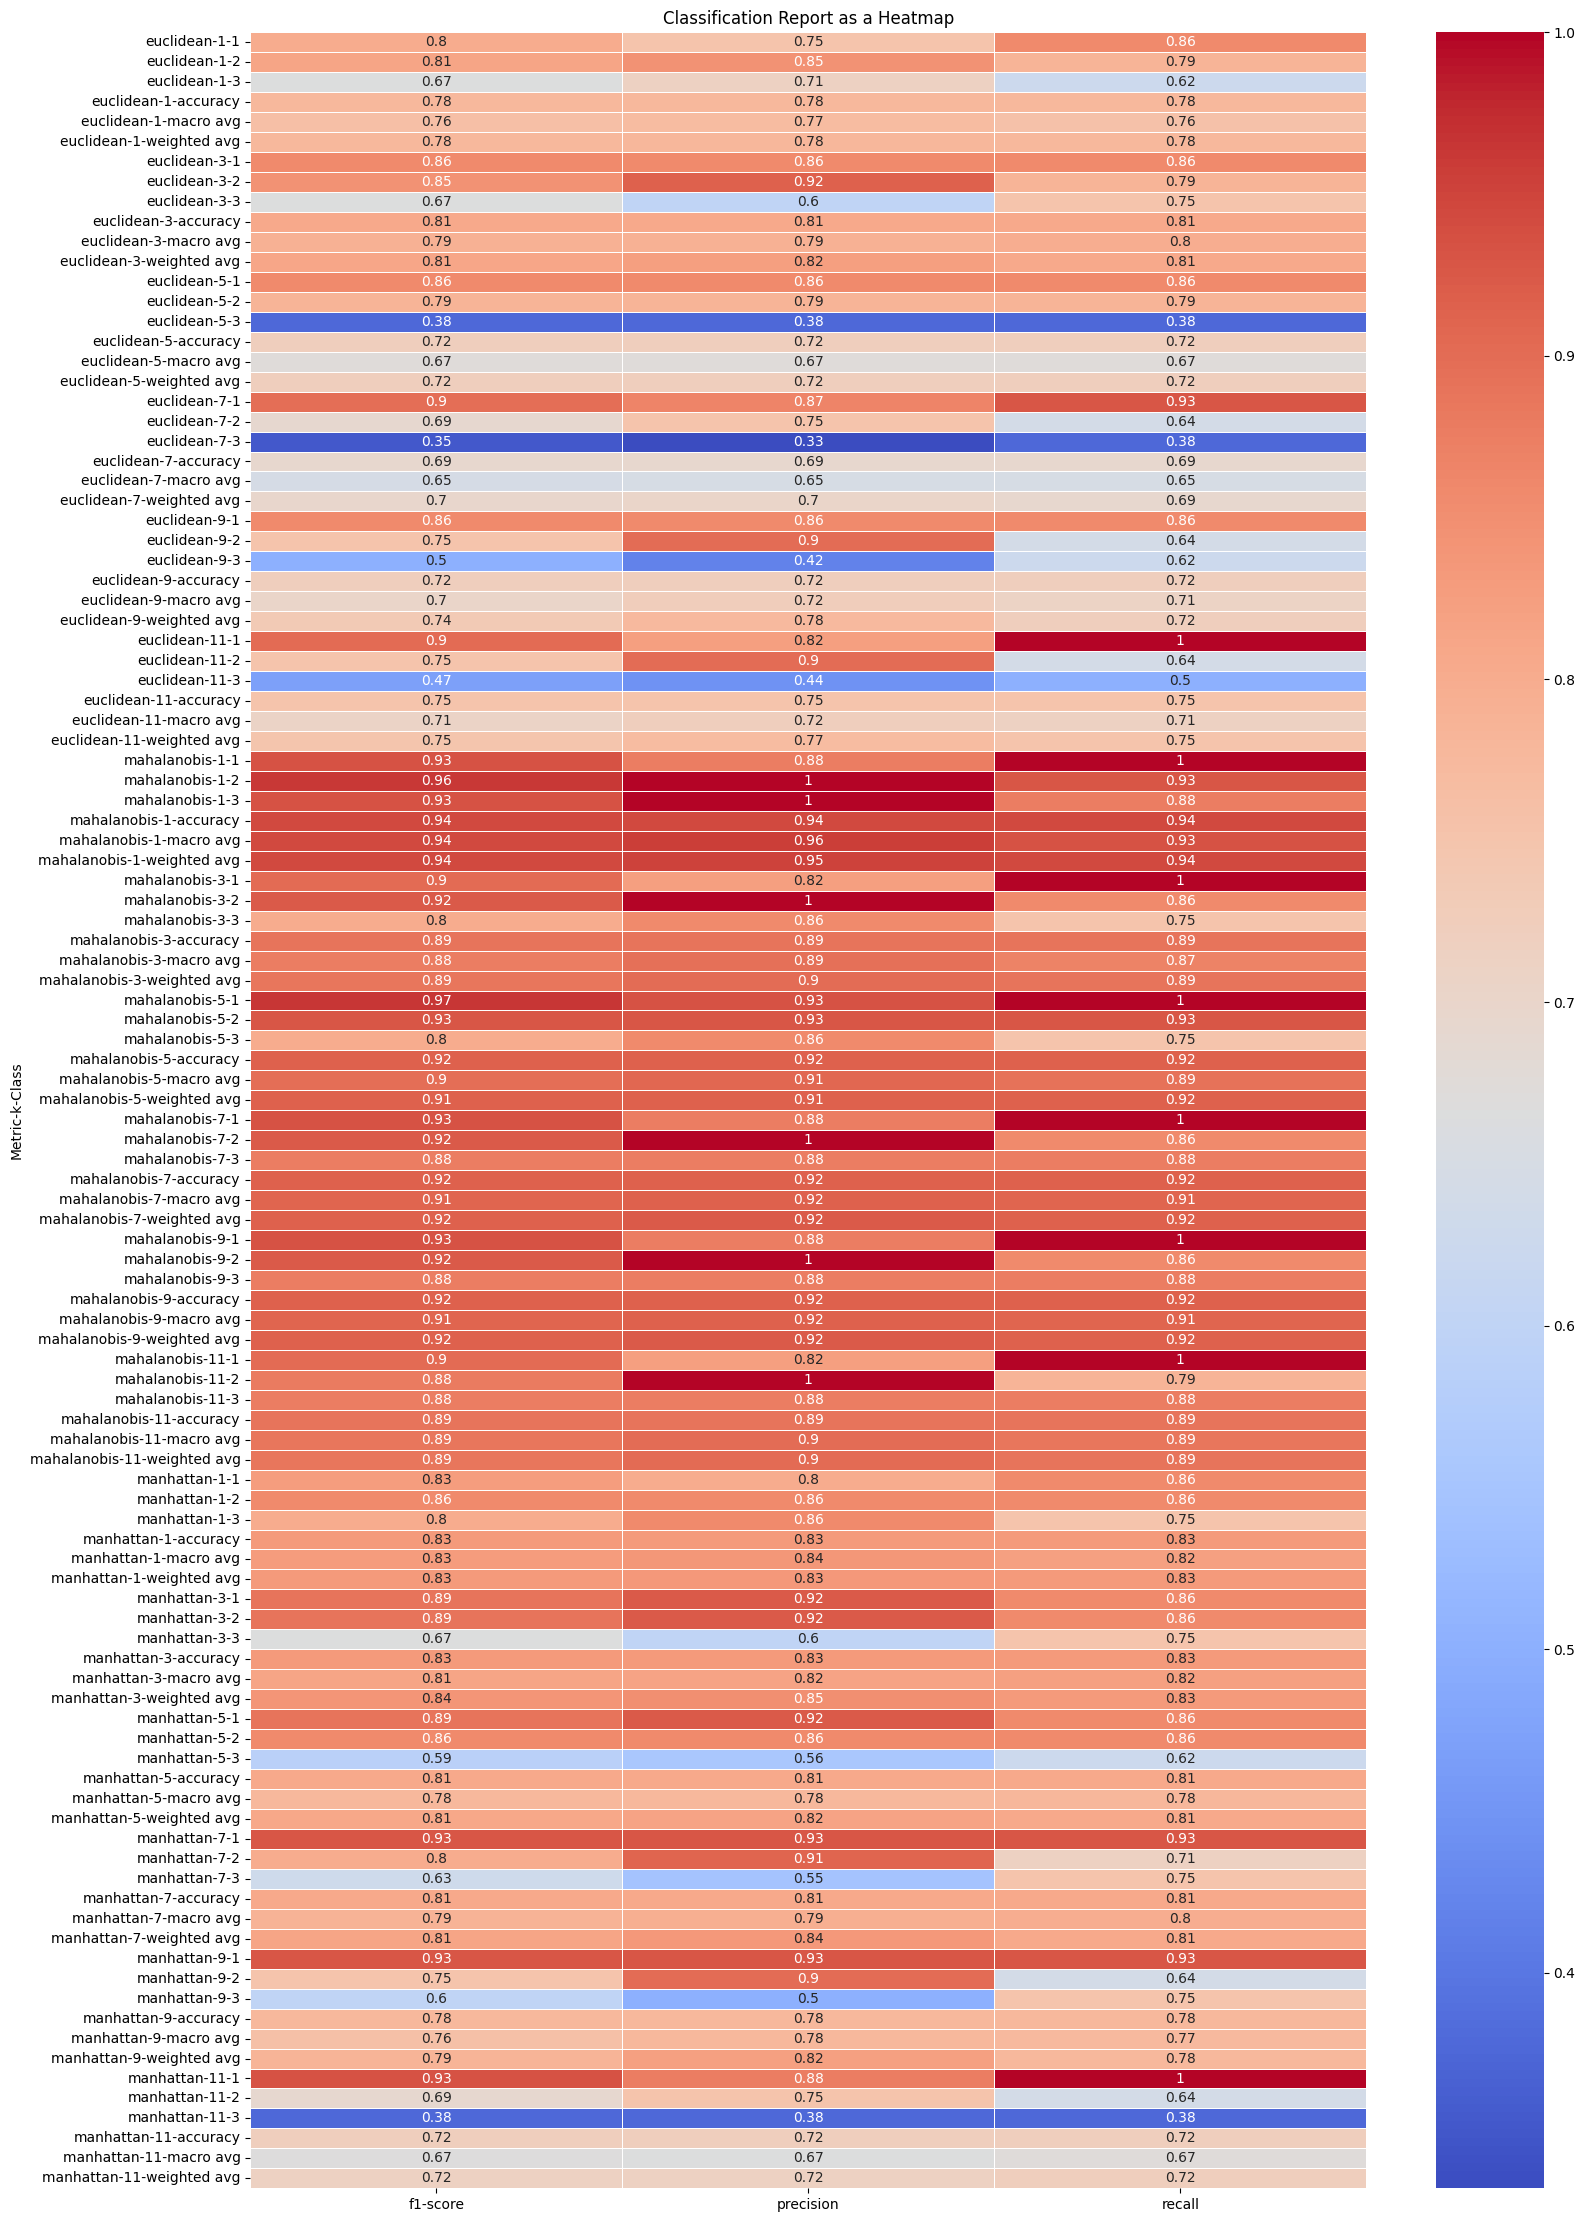

In [37]:
from sklearn.metrics import classification_report
from IPython.display import display
reports = []

for k in ks:
    for metric in ["euclidean", "manhattan", "mahalanobis"]:
        knn_model = knn.KNN(k, metric)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)

        report_dict = classification_report(y_test, y_pred, output_dict=True)
        report_df = pd.DataFrame(report_dict).transpose()

        report_df["k"] = k
        report_df["Metric"] = metric
        reports.append(report_df)

final_report = pd.concat(reports)

final_report.reset_index(inplace=True)
final_report.rename(columns={"index": "Class"}, inplace=True)

display(final_report)

plt.figure(figsize=(18, 28))
pivot = final_report.pivot_table(index=["Metric", "k", "Class"], values=["precision", "recall", "f1-score"])
sns.heatmap(pivot, annot=True, cmap="coolwarm", linewidths=0.5)

plt.title("Classification Report as a Heatmap")
plt.show()

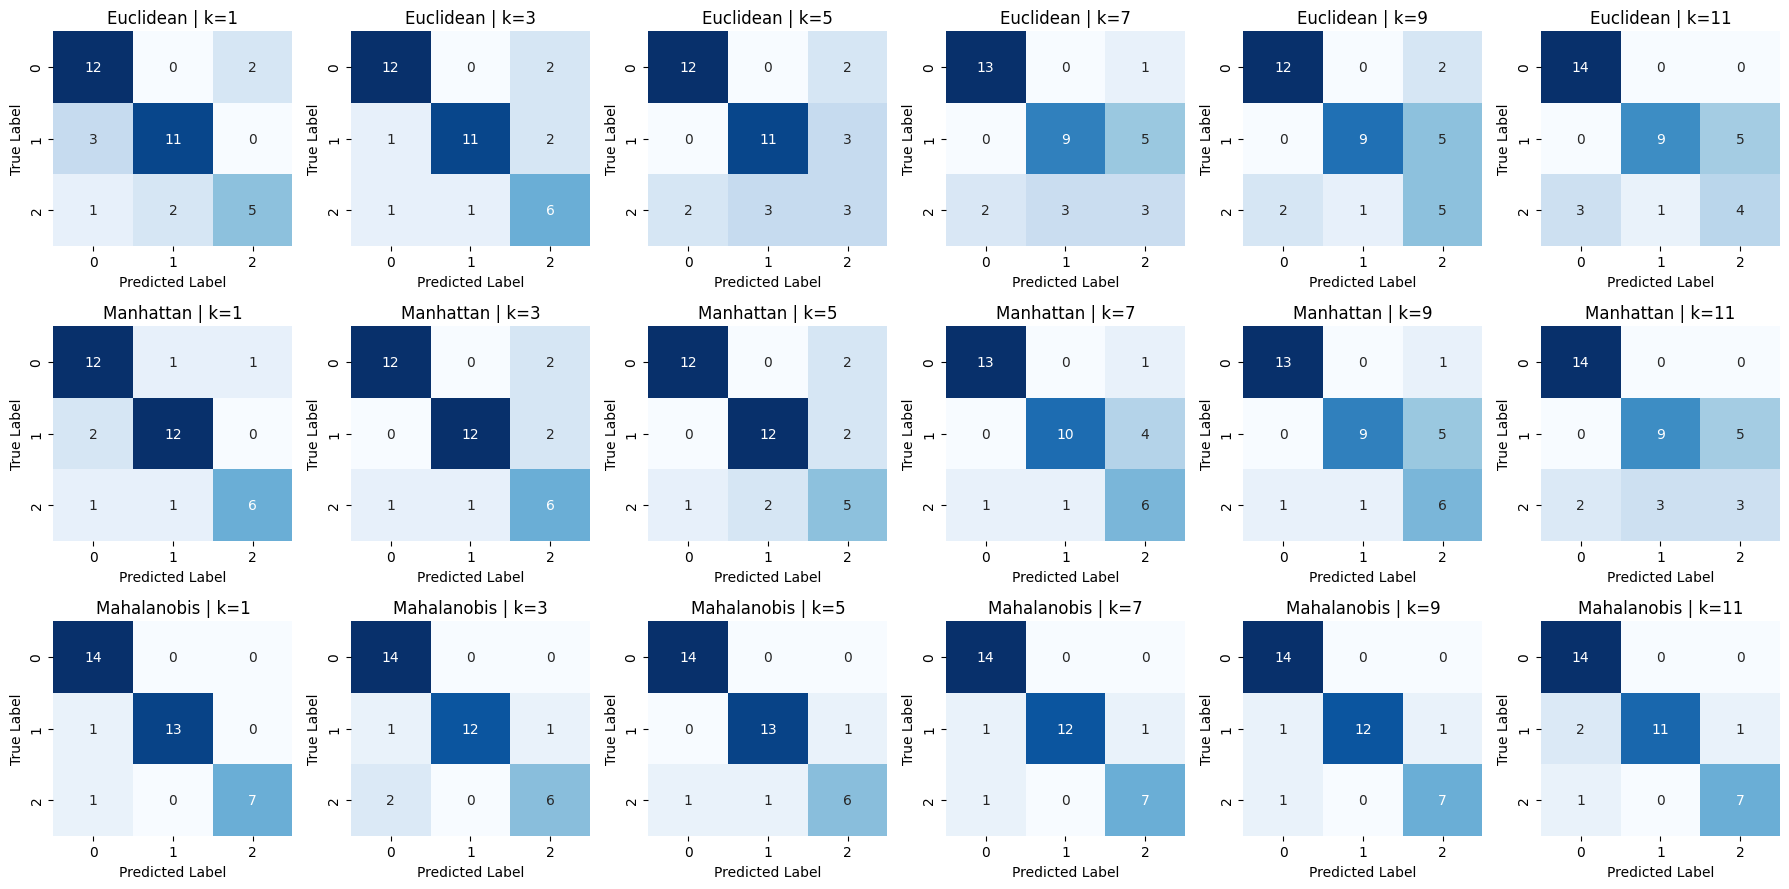

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(18, 9))
metrics = ["Euclidean", "Manhattan", "Mahalanobis"]
k_values = [1, 3, 5, 7, 9, 11]
for row in range(3): 
    for col in range(6):  
        index = col * 3 + row 
        ax = axes[row, col]
        sns.heatmap(cm[index], annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
        ax.set_title(f"{metrics[row]} | k={k_values[col]}")
        ax.set_xlabel("Predicted Label")
        ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()